# TensorFlow - Hola mundo!


Flujo de trabajo:
1. Cargar un conjunto de datos predeterminado.
2. Crear un modelo de aprendizaje automático de red neural que clasifique las imágenes.
3. Entrenar la red neural.
4. Evaluar la exactitud del modelo.

**La base de datos**

## Preparación de TensorFlow

Importamos Tensorflow

In [151]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


## Carga de un conjunto de datos

[Datasets keras](https://keras.io/api/datasets)

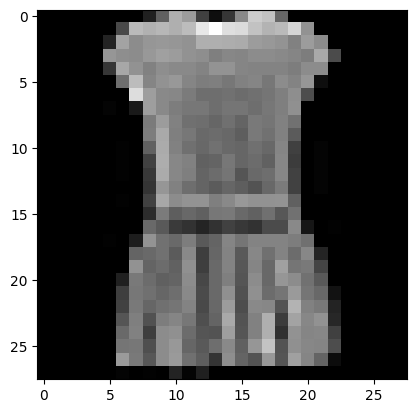

In [152]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_train[3], cmap="gray")

## Creación de un modelo de aprendizaje automático

Cree un modelo `tf.keras.Sequential`:

In [153]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(256, activation='relu'),   #AUMENTAMOS EL NUMERO DE NEURONAS AL DOBLE EN ESTA CAPA DENSA

  tf.keras.layers.Dropout(0.4),   #AUMENTAMOS EN 0.1 EL DROPOUT PARA PREVENIR SOBREAJUSTE

  tf.keras.layers.Dense(10, activation='softmax')
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) es útil para apilar capas donde cada una tiene un [tensor](https://www.tensorflow.org/guide/tensor) de entrada y uno de salida. Las capas son funciones con una estructura matemática desconocida que se puede reutilizar y que tiene variables entrenables. La mayoría de los modelos TensorFlow están compuestos por capas. Este modelo usa las capas [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) y [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Para cada ejemplo, el modelo devuelve un vector de [logits](https://developers.google.com/machine-learning/glossary#logits) o puntajes de [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) (registro de probabilidades) por cada clase.

In [154]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.11902018, 0.06837187, 0.03563691, 0.07562853, 0.13964486,
        0.02844544, 0.06758574, 0.09286926, 0.2437633 , 0.12903398]],
      dtype=float32)

La función `tf.nn.softmax` convierte estas funciones logits en *probabilidades* para cada clase:

In [155]:
tf.nn.softmax(predictions).numpy()

array([[0.10173594, 0.0967115 , 0.09359691, 0.09741585, 0.103856  ,
        0.09292623, 0.09663551, 0.09910994, 0.11525232, 0.10275982]],
      dtype=float32)

Nota: es posible aplicar la función `tf.nn.softmax` en la función de activación para la última capa de la red. Si bien esto puede hacer que la salida del modelo se interprete más directamente, este enfoque no se recomienda ya que es imposible proporcionar un cálculo de pérdida numéricamente estable y exacto para todos los modelos con salida softmax.

Defina la función de pérdida para el entrenamiento con `losses.SparseCategoricalCrossentropy`:

[Cross entropía binaria](https://www.v7labs.com/blog/cross-entropy-loss-guide)

In [156]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [157]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

La función de pérdida toma un vector de valores verdaderos de base y un vector de logits y devuelve una pérdida escalar para cada ejemplo. Esta pérdida es igual a la probabilidad de registro negativa de la clase verdadera: La pérdida es cero si el modelo está seguro de la clase correcta.

El modelo sin entrenar arroja probabilidades cercanas al lo aleatorio (1/10 para cada clase), entonces, la pérdida inicial debería estar cerca de `-tf.math.log(1/10) ~= 2.3`.

La entrópia cruzada para un modelo no entrenado `Pérdida=−log(y)`

In [158]:
y_train[y_train[:1]]

array([5], dtype=uint8)

In [159]:
loss_fn(y_train[:1], predictions).numpy()

2.275361

Antes de empezar el entrenamiento, configure y compile el modelo con Keras `Model.compile`. Configure la clase del [`optimizador`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) como `adam`, establezca `loss` para la función `loss_fn` que definió antes y especifique una métrica a evaluar para el modelo, mediante la determinación del parámetro `metrics` para `accuracy`.

In [160]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,),
              loss=loss_fn,
              metrics=['accuracy'])

## Entrenamiento y evaluación del modelo

Use el método `Model.fit` para ajustar los parámetros del modelo y minimizar la pérdida:

In [161]:
# Definir EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Entrenar el modelo con EarlyStopping
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])

#AUMENTAMOS LAS ÉPOCAS DE ENTRENAMIENTO DE 5 A 8
#METEMOS EN ESTA VARIABLE PARA TENER EL HISTORIAL Y PODEMOS GRAFICAR DESPUES LA VARIACION ENTRE LA PRECISION Y LA PRUEBA

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7670 - accuracy: 0.7414 - val_loss: 0.5372 - val_accuracy: 0.8184
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5161 - accuracy: 0.8227 - val_loss: 0.4732 - val_accuracy: 0.8357
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4572 - accuracy: 0.8414 - val_loss: 0.4325 - val_accuracy: 0.8468
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4200 - accuracy: 0.8522 - val_loss: 0.4199 - val_accuracy: 0.8501
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4016 - accuracy: 0.8575 - val_loss: 0.4027 - val_accuracy: 0.8577
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3825 - accuracy: 0.8655 - val_loss: 0.3841 - val_accuracy: 0.8637
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3677 - accuracy: 0.8687 - val_loss: 0.3773 - val_accuracy:

El método `Model.evaluate` controla el desempeño del modelo, por lo general con un [conjunto de evaluación](https://developers.google.com/machine-learning/glossary#validation-set) o un [conjunto de prueba](https://developers.google.com/machine-learning/glossary#test-set).

In [162]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3233 - accuracy: 0.8840 - 401ms/epoch - 1ms/step


[0.3233053386211395, 0.8840000033378601]

El clasificador de imágenes ahora está entrenado para proporcionar ~88.4% de exactitud en este conjunto de datos. Para más información, lea los [tutoriales de TensorFlow](https://www.tensorflow.org/tutorials/).

Si desea que su modelo devuelva una probabilidad, puede empaquetar el modelo entrenado y adjuntarle el softmax:

In [163]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [164]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08565906, 0.08565887, 0.08565892, 0.08565886, 0.08565886,
        0.08640509, 0.085659  , 0.08716528, 0.08567457, 0.22680157]],
      dtype=float32)>

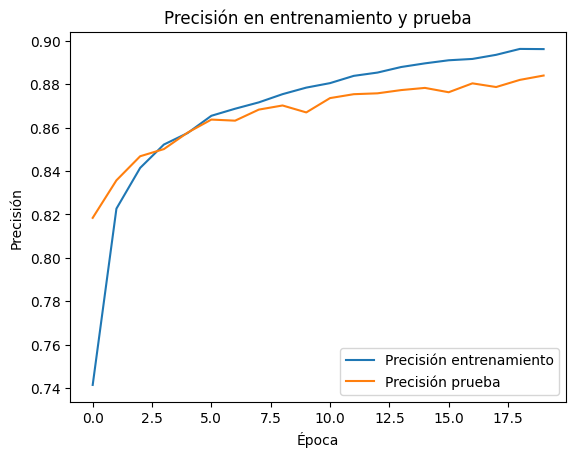

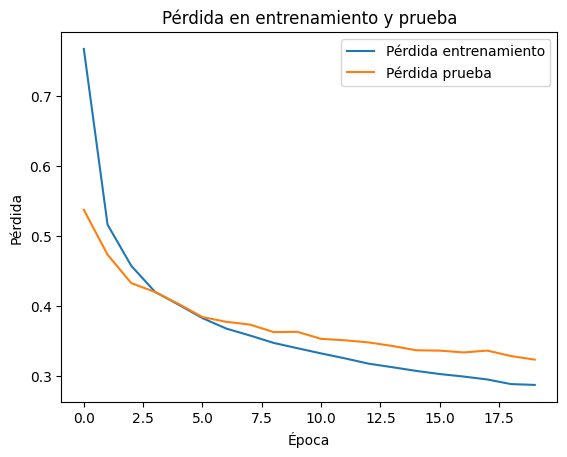

In [165]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión prueba')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Precisión en entrenamiento y prueba')
plt.show()

# Graficar pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida prueba')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.title('Pérdida en entrenamiento y prueba')
plt.show()
